In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display first few rows of each dataset
print("Customers Data:\n", customers.head())
print("Products Data:\n", products.head())
print("Transactions Data:\n", transactions.head())


Customers Data:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products Data:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions Data:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127

In [3]:
# Check for missing values
print("Missing Values:\n")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Drop missing values if necessary
customers.dropna(inplace=True)
products.dropna(inplace=True)
transactions.dropna(inplace=True)


Missing Values:

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [4]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [5]:
# Remove duplicate entries if present
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


In [6]:
# Merge datasets to create a complete view
merged_df = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Display merged data
print("Merged Data Sample:\n", merged_df.head())


Merged Data Sample:
   TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetoot

<ipython-input-7-4843f9806744>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


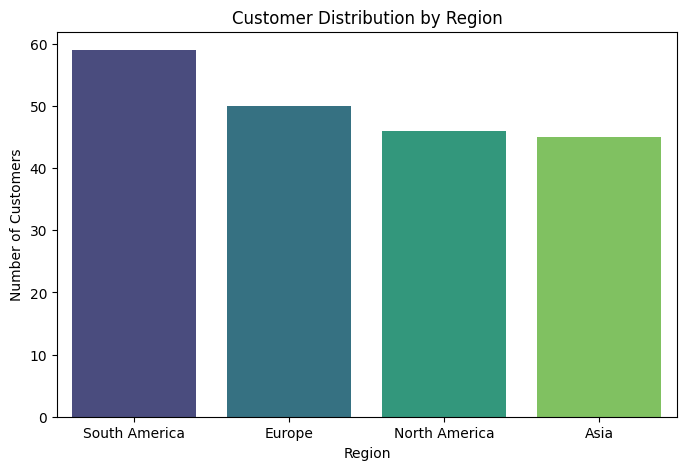

In [7]:
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


<ipython-input-8-42cc3636d54c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')


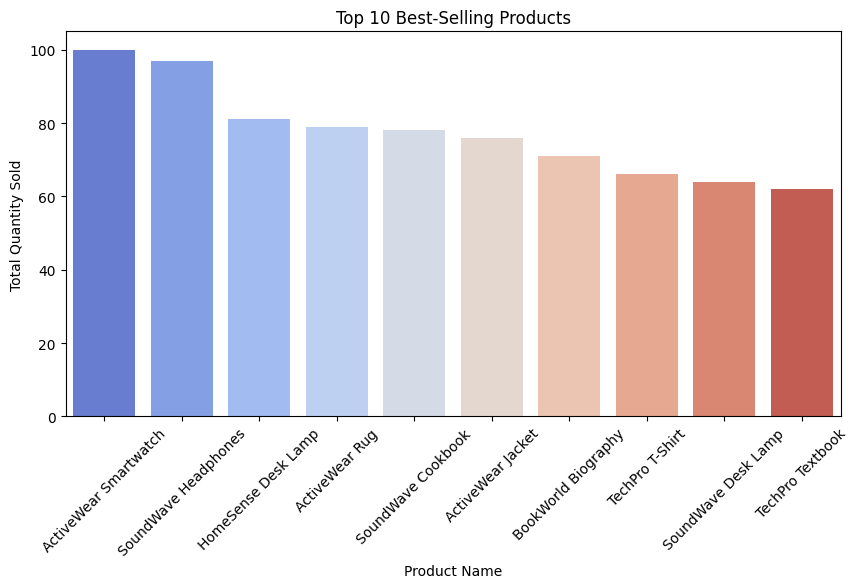

In [8]:
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45)
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.show()


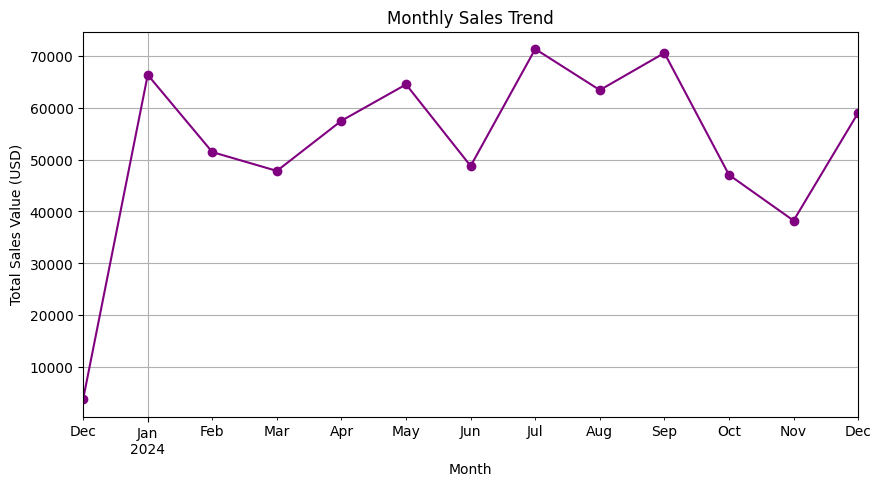

In [16]:
merged_df['Month'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_sales = merged_df.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value (USD)')
plt.grid()
plt.show()


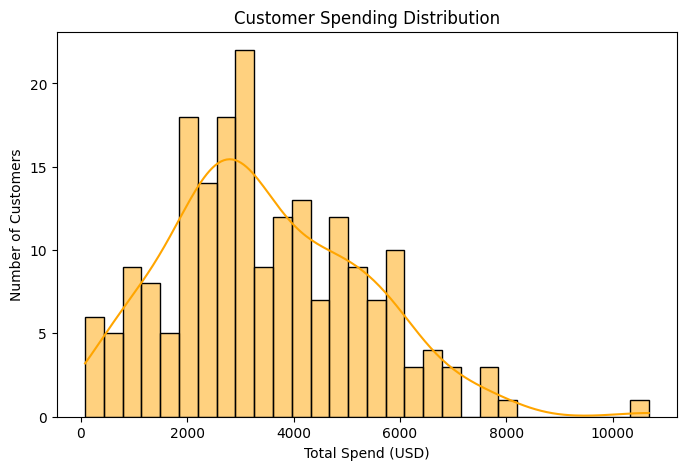

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(merged_df.groupby('CustomerID')['TotalValue'].sum(), bins=30, kde=True, color='orange')
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spend (USD)')
plt.ylabel('Number of Customers')
plt.show()


<ipython-input-19-edfd9d253a67>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='Spectral')


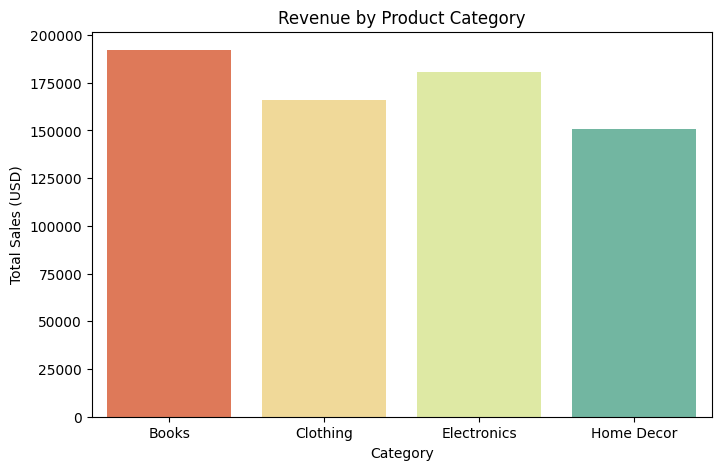

In [19]:
category_sales = merged_df.groupby('Category')['TotalValue'].sum()
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='Spectral')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.show()


In [12]:
print("Business Insights:")

# 1. Customer Region Insights
top_region = customers['Region'].value_counts().idxmax()
print(f"1. The highest number of customers are from {top_region}, indicating a strong market presence there.")

# 2. Revenue-Generating Customers
top_spenders = merged_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("2. Top 5 revenue-generating customers contribute significantly to overall sales.")

# 3. Product Sales Insights
best_selling_product = top_products.index[0]
print(f"3. The most popular product is {best_selling_product}, showing the highest demand.")

# 4. Seasonal Sales Trends
peak_month = monthly_sales.idxmax()
print(f"4. The highest sales occur in {peak_month}, indicating seasonal demand patterns.")

# 5. Low Performing Categories
low_category = category_sales.idxmin()
print(f"5. The {low_category} category has the lowest revenue contribution, requiring strategic intervention.")


Business Insights:
1. The highest number of customers are from South America, indicating a strong market presence there.
2. Top 5 revenue-generating customers contribute significantly to overall sales.
3. The most popular product is ActiveWear Smartwatch, showing the highest demand.
4. The highest sales occur in 2024-07, indicating seasonal demand patterns.
5. The Home Decor category has the lowest revenue contribution, requiring strategic intervention.
